# Wrap-up Challenge

We've provided a file called `starwars.csv` in this folder (you should see it in the file explorer on the left). This is a *tidy* dataset that you're going to practice your Polars and Seaborn skills on by answering the following questions.

*Note: if you find it helpful to see similar commands on this same data using `dplyr` in R, they're available [here](https://psych252.github.io/psych252book/data-wrangling-1.html#looking-at-data)*

For clarity we're going to re-import everything you normally might when working with real data.

In [97]:
import polars as pl
from polars import col, when, lit
import polars.selectors as cs

import seaborn as sns
import matplotlib.pyplot as plt # for customization if needed

## Inspecting data

Load the file and print the first few rows:

In [ ]:
# Your code here

In [98]:
# Solution
sw = pl.read_csv('starwars.csv')
sw.head()

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
str,f64,f64,str,str,str,f64,str,str,str,str
"""Luke Skywalker""",172.0,77.0,"""blond""","""fair""","""blue""",19.0,"""male""","""masculine""","""Tatooine""","""Human"""
"""C-3PO""",167.0,75.0,null,"""gold""","""yellow""",112.0,"""none""","""masculine""","""Tatooine""","""Droid"""
"""R2-D2""",96.0,32.0,null,"""white, blue""","""red""",33.0,"""none""","""masculine""","""Naboo""","""Droid"""
"""Darth Vader""",202.0,136.0,"""none""","""white""","""yellow""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Leia Organa""",150.0,49.0,"""brown""","""light""","""brown""",19.0,"""female""","""feminine""","""Alderaan""","""Human"""


How many rows are in the DataFrame total?

In [ ]:
# Your code here

In [99]:
# Solution
sw.shape

(87, 11)

How many missing values are in each column?

*Hint: checkout `.null_count()`*

In [ ]:
# Your code here

In [100]:
# Solution
sw.null_count()

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,6,28,5,0,0,44,4,4,10,4


How many unique characters are there?

*Hint: for quick operations you can directly refer to a rows/columns using slicing `[]` syntax*

In [ ]:
# Your code here

In [101]:
# Solution
sw['name'].n_unique()

87

Return a list of the unique "species" in the data and sort them alphabetically

In [ ]:
# Your code here

In [102]:
# Solution
sw['species'].unique().sort()

species
str
null
"""Aleena"""
"""Besalisk"""
"""Cerean"""
"""Chagrian"""
…
"""Vulptereen"""
"""Wookiee"""
"""Xexto"""


Return the number of observations for each unique "eye-color"

*Hint: checkout `.value_counts()`*

In [ ]:
# Your code here

In [103]:
# Solution
sw['eye_color'].value_counts()

eye_color,count
str,u32
"""dark""",1
"""red, blue""",1
"""unknown""",3
"""gold""",1
"""orange""",8
…,…
"""blue""",19
"""white""",1
"""pink""",1


## Wrangling Data

Ok lets use the **contexts** and **expressions** we've learned to about filter and aggregate this data in different ways.

Filter rows to get character's whose "gender" is "masculine" and "height" is above the median height of all characters.

How many rows in the result?

In [ ]:
# Your code here

In [104]:
# Solution
sw.filter(
    col('gender').eq('masculine') & col('height').ge(col('height').median())
)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
str,f64,f64,str,str,str,f64,str,str,str,str
"""Darth Vader""",202.0,136.0,"""none""","""white""","""yellow""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Biggs Darklighter""",183.0,84.0,"""black""","""light""","""brown""",24.0,"""male""","""masculine""","""Tatooine""","""Human"""
"""Obi-Wan Kenobi""",182.0,77.0,"""auburn, white""","""fair""","""blue-gray""",57.0,"""male""","""masculine""","""Stewjon""","""Human"""
"""Anakin Skywalker""",188.0,84.0,"""blond""","""fair""","""blue""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Wilhuff Tarkin""",180.0,null,"""auburn, grey""","""fair""","""blue""",64.0,"""male""","""masculine""","""Eriadu""","""Human"""
…,…,…,…,…,…,…,…,…,…,…
"""San Hill""",191.0,null,"""none""","""grey""","""gold""",null,"""male""","""masculine""","""Muunilinst""","""Muun"""
"""Grievous""",216.0,159.0,"""none""","""brown, white""","""green, yellow""",null,"""male""","""masculine""","""Kalee""","""Kaleesh"""
"""Tarfful""",234.0,136.0,"""brown""","""brown""","""blue""",null,"""male""","""masculine""","""Kashyyyk""","""Wookiee"""


Expand your filter to also exclude rows where a character's "mass" is missing (null).

How many rows remain?

In [ ]:
# Your code here


In [105]:
# Solution
sw.filter(
    col('gender').eq('masculine') & col('height').ge(col('height').median()) & col('mass').is_not_null()
)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
str,f64,f64,str,str,str,f64,str,str,str,str
"""Darth Vader""",202.0,136.0,"""none""","""white""","""yellow""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Biggs Darklighter""",183.0,84.0,"""black""","""light""","""brown""",24.0,"""male""","""masculine""","""Tatooine""","""Human"""
"""Obi-Wan Kenobi""",182.0,77.0,"""auburn, white""","""fair""","""blue-gray""",57.0,"""male""","""masculine""","""Stewjon""","""Human"""
"""Anakin Skywalker""",188.0,84.0,"""blond""","""fair""","""blue""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Chewbacca""",228.0,112.0,"""brown""","""unknown""","""blue""",200.0,"""male""","""masculine""","""Kashyyyk""","""Wookiee"""
…,…,…,…,…,…,…,…,…,…,…
"""Wat Tambor""",193.0,48.0,"""none""","""green, grey""","""unknown""",null,"""male""","""masculine""","""Skako""","""Skakoan"""
"""Grievous""",216.0,159.0,"""none""","""brown, white""","""green, yellow""",null,"""male""","""masculine""","""Kalee""","""Kaleesh"""
"""Tarfful""",234.0,136.0,"""brown""","""brown""","""blue""",null,"""male""","""masculine""","""Kashyyyk""","""Wookiee"""


Expand your filter to include the previous result *or* characters whose "skin_color" is 'dark' or 'pale'

How many rows in this result?

In [ ]:
# Your code here


In [106]:
# Solution
sw.filter(
    (col('gender').eq('masculine') & 
     col('height').ge(col('height').median()) & 
     col('mass').is_not_null()) |  
     col('skin_color').is_in(['dark', 'pale'])
)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
str,f64,f64,str,str,str,f64,str,str,str,str
"""Darth Vader""",202.0,136.0,"""none""","""white""","""yellow""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Biggs Darklighter""",183.0,84.0,"""black""","""light""","""brown""",24.0,"""male""","""masculine""","""Tatooine""","""Human"""
"""Obi-Wan Kenobi""",182.0,77.0,"""auburn, white""","""fair""","""blue-gray""",57.0,"""male""","""masculine""","""Stewjon""","""Human"""
"""Anakin Skywalker""",188.0,84.0,"""blond""","""fair""","""blue""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Chewbacca""",228.0,112.0,"""brown""","""unknown""","""blue""",200.0,"""male""","""masculine""","""Kashyyyk""","""Wookiee"""
…,…,…,…,…,…,…,…,…,…,…
"""Tarfful""",234.0,136.0,"""brown""","""brown""","""blue""",null,"""male""","""masculine""","""Kashyyyk""","""Wookiee"""
"""Raymus Antilles""",188.0,79.0,"""brown""","""light""","""brown""",null,"""male""","""masculine""","""Alderaan""","""Human"""
"""Sly Moore""",178.0,48.0,"""none""","""pale""","""white""",null,null,null,"""Umbara""",null


What is the average height and average mass of characters who are from a "homeworld" whose name starts with the letters 'Co'?


*Hint: you can "chain" a `.select()` onto the result of a `.filter()`*

In [ ]:
# Your code


In [107]:
sw.filter(
    col('homeworld').str.starts_with('Co')
).select(
    col('height','mass').mean()
)

height,mass
f64,f64
175.666667,71.5


Summarize the mean and standard-deviation of the "height" and "mass" of all non-Human characters, split by "sex", and sort the result by the mean height in *descending order*.


*Hint: you can chain a `.group_by()` after a `.filter()`, and chain `.sort()` at the end*

In [ ]:
# Your code here


In [108]:
# Solution
sw.filter(
    ~col('species').eq('Human')
).group_by('sex').agg(
    height_mean = col('height').mean(),
    height_std = col('height').std(),
    mass_mean = col('mass').mean(),
    mass_std = col('mass').std(),
).sort('height_mean', descending=True)

sex,height_mean,height_std,mass_mean,mass_std
str,f64,f64,f64,f64
"""female""",179.571429,16.081637,53.866667,3.089768
"""male""",176.911765,46.299007,76.48,34.240717
"""hermaphroditic""",175.0,null,1358.0,null
"""none""",131.2,49.149771,69.75,51.031853


Extend your summary to filter out any values of "sex" that are "hermaphroditic" or "none" (not missing/null!)

In [ ]:
# Your code here


In [109]:
# Solution
sw.filter(
    ~col('species').eq('Human') & ~col('sex').is_in(['hermaphroditic', 'none'])
).group_by('sex').agg(
    height_mean = col('height').mean(),
    height_std = col('height').std(),
    mass_mean = col('mass').mean(),
    mass_std = col('mass').std(),
).sort('height_mean', descending=True)

sex,height_mean,height_std,mass_mean,mass_std
str,f64,f64,f64,f64
"""female""",179.571429,16.081637,53.866667,3.089768
"""male""",176.911765,46.299007,76.48,34.240717


Add a column to the original DataFrame called "mass_lbs" that converts "mass" to lbs by multiplying by 2.2 and drop all remaining columns except: name, height, and species.

Remove any rows with null values and save the result to a new DataFrame called `sw_processed`

In [ ]:
# Your code here


In [110]:
# Solution
sw_processed = (
    sw.with_columns(
        mass_lbs = col('mass') * 2.2
    ).select(['name','height','species','mass_lbs']).drop_nulls()
)
sw_processed

name,height,species,mass_lbs
str,f64,str,f64
"""Luke Skywalker""",172.0,"""Human""",169.4
"""C-3PO""",167.0,"""Droid""",165.0
"""R2-D2""",96.0,"""Droid""",70.4
"""Darth Vader""",202.0,"""Human""",299.2
"""Leia Organa""",150.0,"""Human""",107.8
…,…,…,…
"""Shaak Ti""",178.0,"""Togruta""",125.4
"""Grievous""",216.0,"""Kaleesh""",349.8
"""Tarfful""",234.0,"""Wookiee""",299.2


Use the new DataFrame you created `sw_processed` to add 2 additional columns called "height_z_species" and "mass_lbs_z_species" that are z-scored versions of height and mass_lbs by "species"

Save the DataFrame by overwriting the previous variable `sw_processed`

In [ ]:
# Your code here


In [111]:
# Solution
zscore = lambda name: ( col(name) - col(name).mean() ) / col(name).std()

sw_processed = sw_processed.with_columns(
    height_z_species = zscore('height').over('species'),
    mass_lbs_z_species = zscore('mass_lbs').over('species'),
)

sw_processed

name,height,species,mass_lbs,height_z_species,mass_lbs_z_species
str,f64,str,f64,f64,f64
"""Luke Skywalker""",172.0,"""Human""",169.4,-0.71983,-0.222945
"""C-3PO""",167.0,"""Droid""",165.0,0.519167,0.102877
"""R2-D2""",96.0,"""Droid""",70.4,-0.84605,-0.739734
"""Darth Vader""",202.0,"""Human""",299.2,1.897735,2.828964
"""Leia Organa""",150.0,"""Human""",107.8,-2.639378,-1.671308
…,…,…,…,…,…
"""Shaak Ti""",178.0,"""Togruta""",125.4,null,null
"""Grievous""",216.0,"""Kaleesh""",349.8,null,null
"""Tarfful""",234.0,"""Wookiee""",299.2,0.707107,0.707107


Whats the shape of the result?

In [ ]:
# Your code here


In [112]:
# Solution
sw_processed.shape

(56, 6)

How many unique characters are in the result?

In [ ]:
# Your code here

In [113]:
sw_processed['name'].n_unique()

56

Drop all non-zscored numeric columns and once again save the result to `sw_processed`, overwriting your previous DataFrame

In [ ]:
# Your code here


In [114]:
# Solution
sw_processed = sw_processed.drop(['height', 'mass_lbs'])
sw_processed

name,species,height_z_species,mass_lbs_z_species
str,str,f64,f64
"""Luke Skywalker""","""Human""",-0.71983,-0.222945
"""C-3PO""","""Droid""",0.519167,0.102877
"""R2-D2""","""Droid""",-0.84605,-0.739734
"""Darth Vader""","""Human""",1.897735,2.828964
"""Leia Organa""","""Human""",-2.639378,-1.671308
…,…,…,…
"""Shaak Ti""","""Togruta""",null,null
"""Grievous""","""Kaleesh""",null,null
"""Tarfful""","""Wookiee""",0.707107,0.707107


What is Leia Organa's height in z-scores?

In [ ]:
# Your code here


In [117]:
# Solution
sw_processed.filter(
    col('name').eq('Leia Organa')
).select('name', 'height_z_species')

name,height_z_species
str,f64
"""Leia Organa""",-2.639378


Who's heavier in z-scores, Owen Lars or Darth Vader and by how much approximately?

In [ ]:
# Your code here


In [118]:
# Solution
sw_processed.filter(
    col('name').is_in(['Owen Lars', 'Darth Vader'])
).select('name', 'mass_lbs_z_species')

name,mass_lbs_z_species
str,f64
"""Darth Vader""",2.828964
"""Owen Lars""",2.001328


Add in a column to your DataFrame `sw_processed` called "height_category" that splits characters based upon the z-scored height. 

If their height is between (or including) -2 and 2 their height_category should be in the "normal".  
If their height is < -2 their height_category should be in the "short".  
If their height is > 2 their height_category should be in the "tall".  

Take the resulting column along with the "name" and "species" columns and save them to a new DataFrame variable called `sw_heights`

In [ ]:
# Your code here


In [119]:
# Solution
sw_heights = sw_processed.with_columns(
    height_category = when(col('height_z_species').ge(-2).and_(col('height_z_species').le(2)))
                      .then(lit('normal'))
                      .when(col('height_z_species').lt(-2))
                      .then(lit('short'))
                      .otherwise(lit('tall'))
                      
).select('name','species', 'height_category')
sw_heights

name,species,height_category
str,str,str
"""Luke Skywalker""","""Human""","""normal"""
"""C-3PO""","""Droid""","""normal"""
"""R2-D2""","""Droid""","""normal"""
"""Darth Vader""","""Human""","""normal"""
"""Leia Organa""","""Human""","""short"""
…,…,…
"""Shaak Ti""","""Togruta""","""tall"""
"""Grievous""","""Kaleesh""","""tall"""
"""Tarfful""","""Wookiee""","""normal"""


Summarize the number of unique species by "height_category". How many of each are there?

In [ ]:
# Your code here


In [120]:
# Solution
sw_heights.group_by('height_category').agg(
    col('species').n_unique()
)

height_category,species
str,u32
"""short""",1
"""tall""",26
"""normal""",5


Are there any humans in the "tall" category?

*Hint: try using `.unique()` inside of a `.group_by()` context. Then use a `.select()` context on the result that includes an expression using the [`.list` attribute operations](https://docs.pola.rs/api/python/stable/reference/expressions/list.html) to check if 'Human' is one of the list items*

In [ ]:
# Your code here


In [121]:
# Solution
sw_heights.group_by('height_category').agg(
    col('species').unique()
).select(
    col('height_category'),
    col('species').list.contains('Human')
)

height_category,species
str,bool
"""normal""",true
"""short""",true
"""tall""",false


## Visualizing Data

Using the original (unfiltered/aggregated) DataFrame, create a bar-plot showing the mean height for each homeworld and rotate the x-labels by `90` degrees

*Hint: You can use `sns.barplot` to get back a matplotlib `axis` that you can customize  
Or `sns.catplot` with `kind='bar'` to get back a Seaborn [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) that is customized slightly differently*

In [ ]:
# Your code here

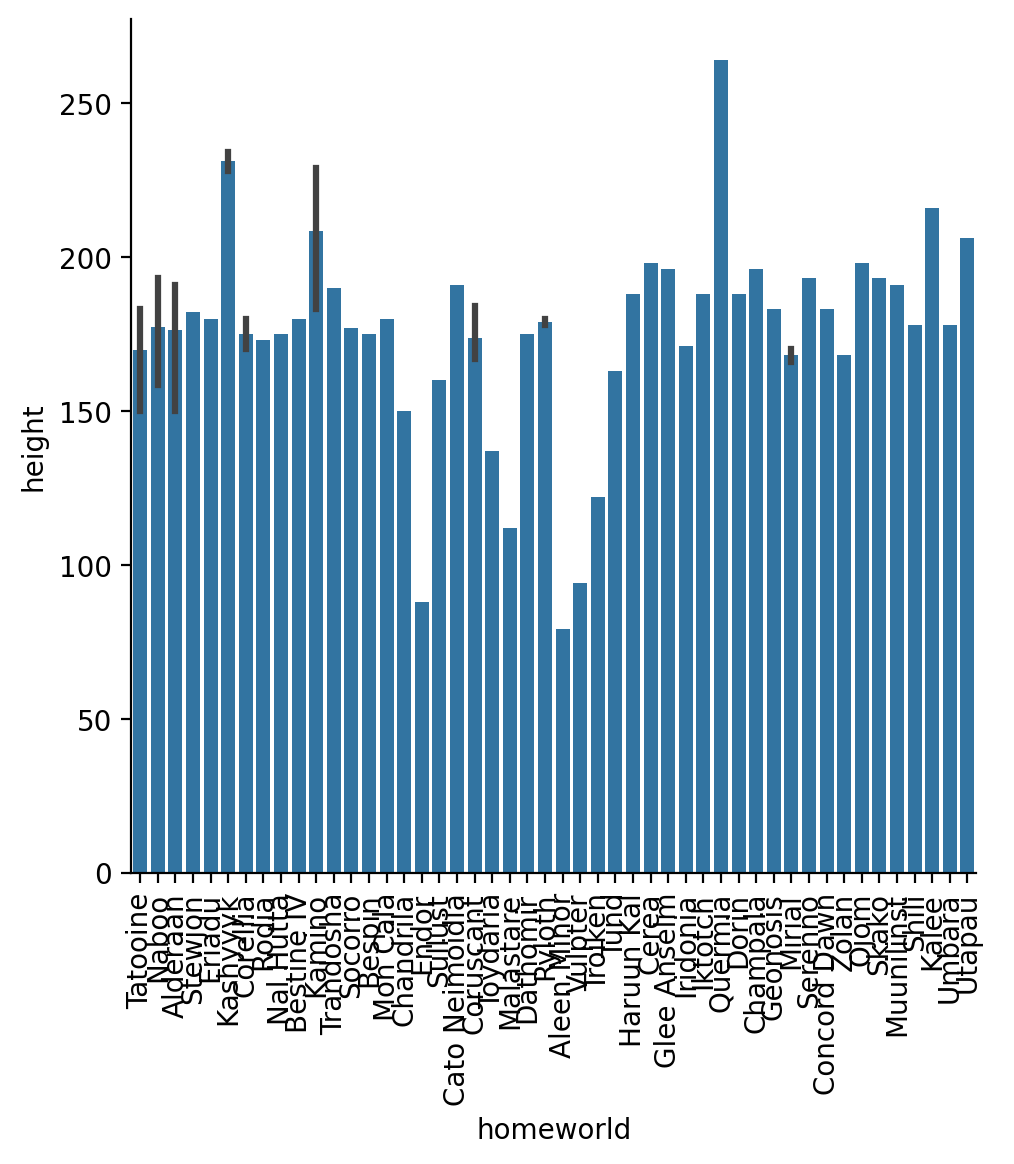

In [122]:
g = sns.catplot(data=sw, x='homeworld', y='height', kind='bar')
g.set_xticklabels(rotation=90)

Make a box plot of "mass" for only male and female characters who's homeworld is Tatooine, Naboo, or Kashyyyk

*Hint: you'll have to filter the data first*

In [ ]:
# Your code here

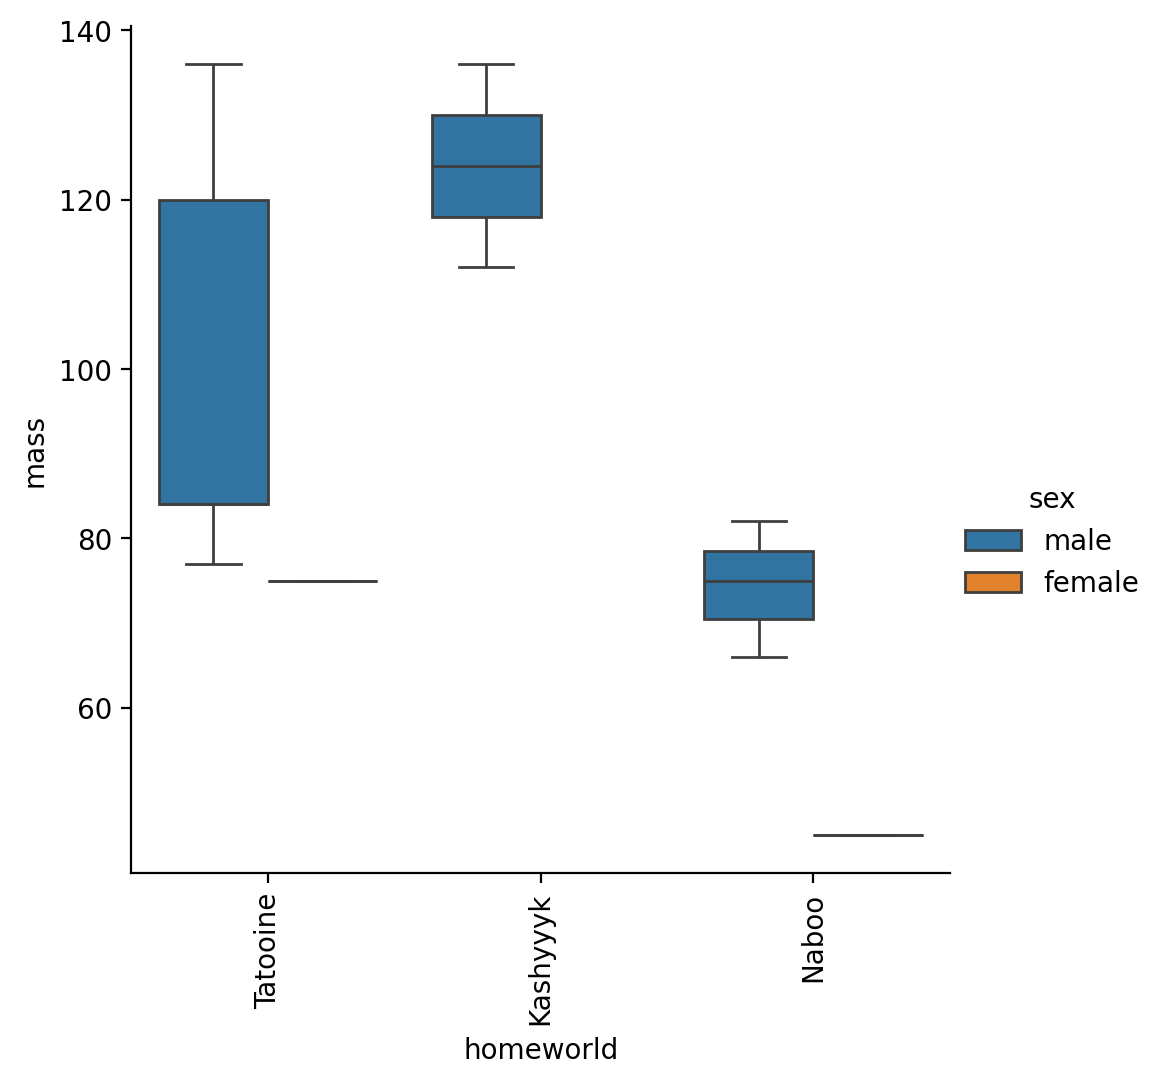

In [123]:
to_plot = sw.filter(
    col('sex').is_in(['male', 'female']),
    col('homeworld').is_in(['Tatooine', 'Naboo', 'Kashyyyk'])
)
g = sns.catplot(data=to_plot, x='homeworld', y='mass', kind='box', hue='sex')
g.set_xticklabels(rotation=90)

Create a facet-grid of 2 scatter plots between height and mass separately for Tatooine and Naboo

*Hint: you'll have to filter again first  
Then check-out the [multi-plot grid tutorial](https://seaborn.pydata.org/tutorial/axis_grids.html) for help*

In [ ]:
# Your code here

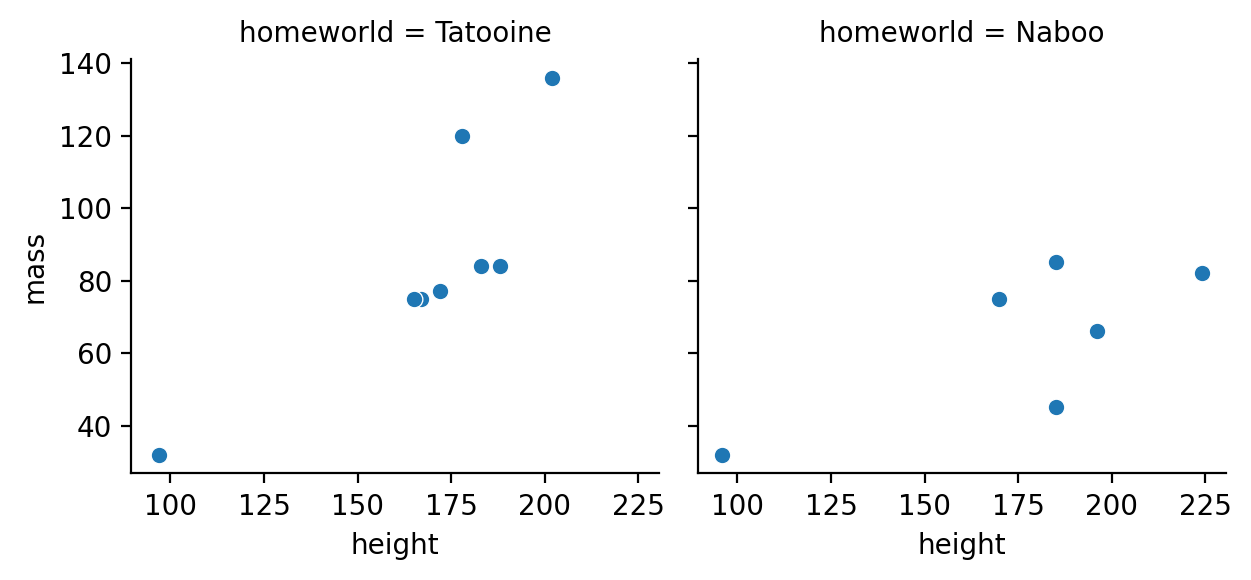

In [124]:
to_plot = sw.filter(
    col('homeworld').is_in(['Tatooine', 'Naboo'])
)
g = sns.FacetGrid(to_plot, col='homeworld', col_wrap=4)
g.map(sns.scatterplot, 'height', 'mass')

Update the plot to color points by sex

*Hint: you can use the `.add_legend()` method on a FaceGrid to display the legend* 

In [ ]:
# Your code here

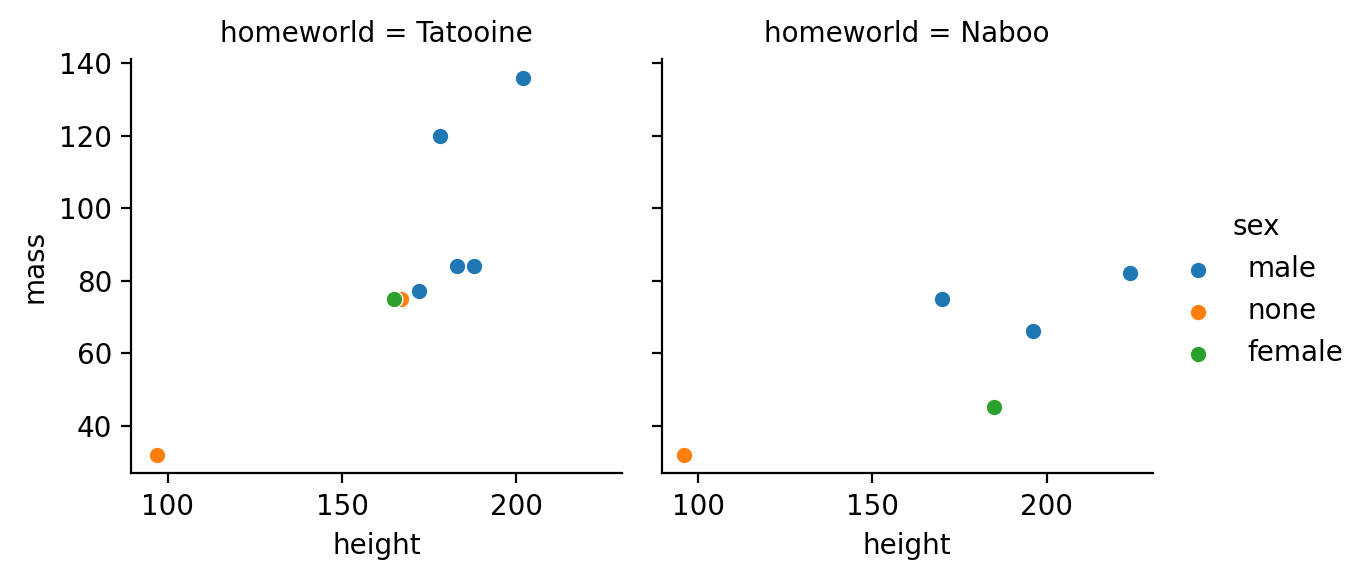

In [125]:
to_plot = sw.filter(
    col('homeworld').is_in(['Tatooine', 'Naboo'])
)
g = sns.FacetGrid(to_plot, col='homeworld', hue='sex')
g.map(sns.scatterplot, 'height', 'mass')
g.add_legend()

Remove the color by gender and add a regression line to each plot.  
For which homeworld is there a stronger relationship?

*Hint: you can use the `.add_legend()` method on a FaceGrid to display the legend* 

In [ ]:
# Your code here


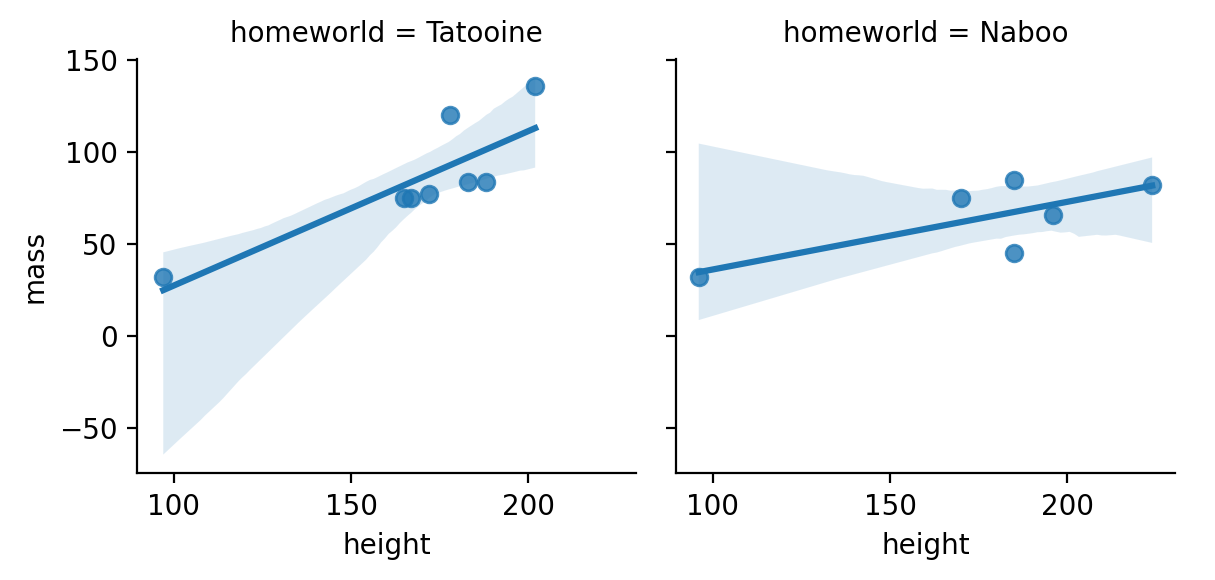

In [126]:
to_plot = sw.filter(
    col('homeworld').is_in(['Tatooine', 'Naboo'])
)
g = sns.FacetGrid(to_plot, col='homeworld')
g.map(sns.regplot, 'height', 'mass')
g.add_legend()

Take a look at the pairwise relationships between all *numeric* columns

*Hint: you'll have to select the columns you want first  
Then take a look at `sns.pairplot()`  
If you run into an error, remember you can eaasily convert between a Polars and Pandas DataFrame*

In [ ]:
# Your code here

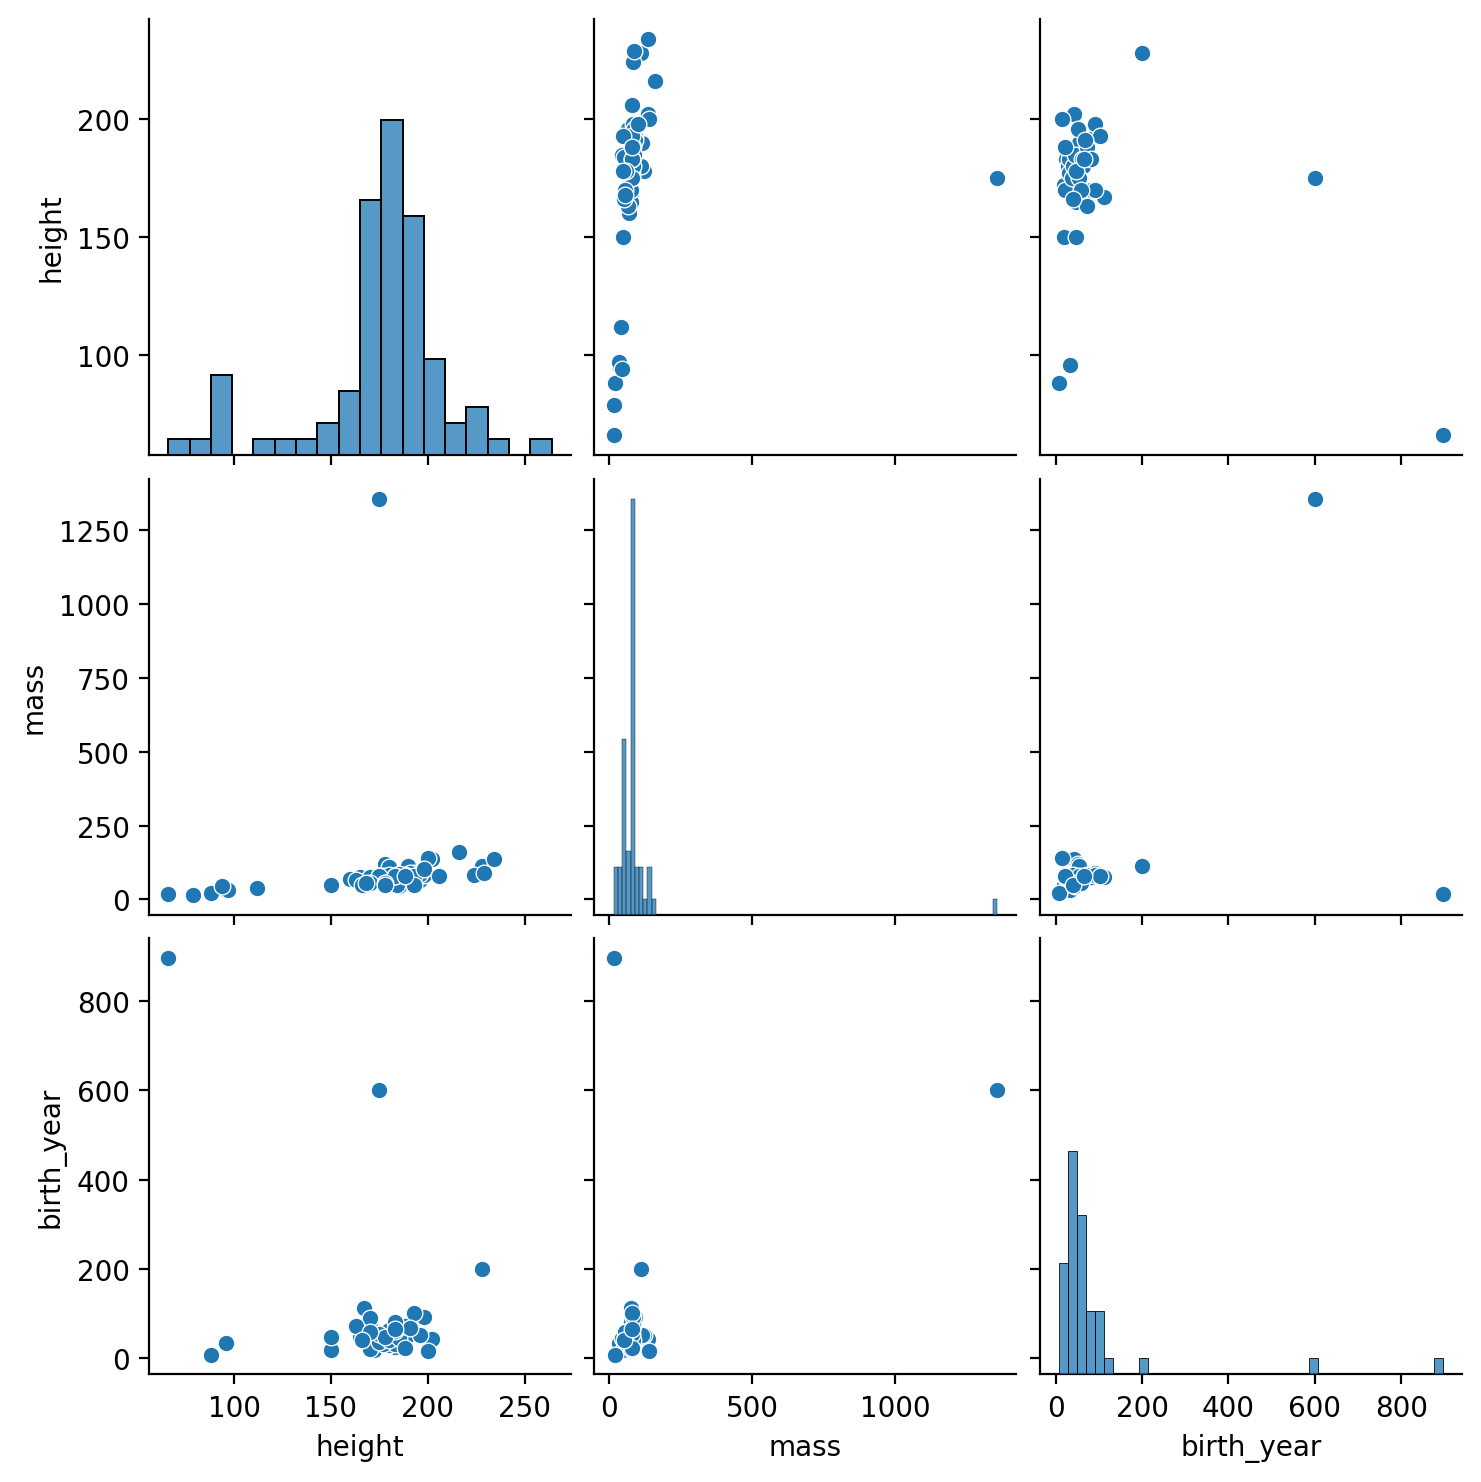

In [127]:
to_plot = sw.select(
    cs.numeric()
).to_pandas()

sns.pairplot(to_plot)